Three images of the same scene are analyzed from June 20, 1994 (19940620):
- LT5_L1: Landsat 5 Level 1 – Raw image without atmospheric correction accessed from USGS.
- LT5_L2: Landsat 5 Level 2 – USGS image pre-processed through an atmospheric correction algorithm.
- LT5_L1_acolite: Landsat 5 Level 1 – The raw image processed for atmospheric correction using Acolite.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import ee
import geemap
Map= geemap.Map()

In [2]:
import geemap
import ee

# Initialize Earth Engine
ee.Initialize()

# Define the coordinates (Big Moose Lake)
latitude = 43.82569819
longitude = -74.8592526

# Create an EE Geometry Point
lake_point = ee.Geometry.Point(longitude, latitude)

# Create a 100-meter buffered box around the lake point
buffered_polygon = lake_point.buffer(100)

# Convert EE Geometry to a Feature for visualization
buffered_feature = ee.Feature(buffered_polygon, {'type': 'buffer'})

# Convert EE Feature to a GeoJSON for visualization in geemap
buffered_geojson = buffered_feature.geometry().getInfo()

# Initialize the map centered around the lake point
center = [latitude, longitude]
m = geemap.Map(center=center, zoom=14)

# Add the buffered polygon to the map
m.add_geojson(buffered_geojson, layer_name='Buffered Polygon', style={'color': 'black', 'fillOpacity': 0.1})

# Display the map
m


Map(center=[43.82569819, -74.8592526], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=…

In [3]:
# # no scaling factor applied

# import rasterio
# from rasterio.features import geometry_mask
# from shapely.geometry import Point
# import numpy as np
# import pandas as pd

# # Define file paths for all bands
# b1_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L1TP_015030_19940620_20200913_02_T1_usgs\LT05_L1TP_015030_19940620_20200913_02_T1_B1.TIF"
# b2_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L1TP_015030_19940620_20200913_02_T1_usgs\LT05_L1TP_015030_19940620_20200913_02_T1_B2.TIF"
# b3_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L1TP_015030_19940620_20200913_02_T1_usgs\LT05_L1TP_015030_19940620_20200913_02_T1_B3.TIF"
# b4_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L1TP_015030_19940620_20200913_02_T1_usgs\LT05_L1TP_015030_19940620_20200913_02_T1_B4.TIF"
# b5_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L1TP_015030_19940620_20200913_02_T1_usgs\LT05_L1TP_015030_19940620_20200913_02_T1_B5.TIF"
# b6_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L1TP_015030_19940620_20200913_02_T1_usgs\LT05_L1TP_015030_19940620_20200913_02_T1_B6.TIF"
# b7_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L1TP_015030_19940620_20200913_02_T1_usgs\LT05_L1TP_015030_19940620_20200913_02_T1_B7.TIF"
# qa_pixel_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L1TP_015030_19940620_20200913_02_T1_usgs\LT05_L1TP_015030_19940620_20200913_02_T1_QA_PIXEL.TIF"
# qa_radsat_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L1TP_015030_19940620_20200913_02_T1_usgs\LT05_L1TP_015030_19940620_20200913_02_T1_QA_RADSAT.TIF"
# saa_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L1TP_015030_19940620_20200913_02_T1_usgs\LT05_L1TP_015030_19940620_20200913_02_T1_SAA.TIF"
# sza_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L1TP_015030_19940620_20200913_02_T1_usgs\LT05_L1TP_015030_19940620_20200913_02_T1_SZA.TIF"
# vaa_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L1TP_015030_19940620_20200913_02_T1_usgs\LT05_L1TP_015030_19940620_20200913_02_T1_VAA.TIF"
# vza_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L1TP_015030_19940620_20200913_02_T1_usgs\LT05_L1TP_015030_19940620_20200913_02_T1_VZA.TIF"

# # List of TIFF files
# tiff_files = [b1_tiff, b2_tiff, b3_tiff, b4_tiff, b5_tiff, b6_tiff, b7_tiff, qa_pixel_tiff, qa_radsat_tiff, saa_tiff, sza_tiff, vaa_tiff, vza_tiff]

# # Define custom column names for each band
# column_names = {
#     b1_tiff: 'B1',
#     b2_tiff: 'B2',
#     b3_tiff: 'B3',
#     b4_tiff: 'B4',
#     b5_tiff: 'B5',
#     b6_tiff: 'B6',
#     b7_tiff: 'B7',
#     qa_pixel_tiff: 'QA_PIXEL',
#     qa_radsat_tiff: 'QA_RADSAT',
#     saa_tiff: 'SAA',
#     sza_tiff: 'SZA',
#     vaa_tiff: 'VAA',
#     vza_tiff: 'VZA'
# }

# # Initialize empty DataFrame
# LT5_L1 = pd.DataFrame()

# # Open the first TIFF file to get the spatial information
# with rasterio.open(tiff_files[0]) as src:
#     # Convert the latitude and longitude to the coordinate reference system of the image
#     latitude = 43.82569819
#     longitude = -74.8592526
#     point = Point(longitude, latitude)
#     point_transformed = rasterio.warp.transform_geom('EPSG:4326', src.crs, point.__geo_interface__)

#     # Create a buffer around the point
#     buffer_distance = 100  # Define buffer distance in meters
#     buffer = Point(point_transformed['coordinates']).buffer(buffer_distance)

#     # Create a mask for the buffer
#     mask = geometry_mask([buffer], transform=src.transform, invert=True, out_shape=(src.height, src.width))

#     # Read the data within the mask for the first band
#     band_data = src.read(1)
#     values_within_buffer = band_data[mask]

#     # Get the pixel coordinates within the buffer
#     rows, cols = np.where(mask)

#     # Add the values as a new column in the DataFrame
#     LT5_L1[column_names[tiff_files[0]]] = values_within_buffer

#     # Add 'row' and 'col' columns to DataFrame before 'B1'
#     LT5_L1.insert(0, 'col', cols)
#     LT5_L1.insert(0, 'row', rows)

#     # Calculate the mean value within the buffer for the first band
#     mean_value = np.mean(values_within_buffer)
#     print(f"Mean value for {column_names[tiff_files[0]]} within buffer: {mean_value}")

# # Now iterate over the remaining TIFF files to add additional bands to the DataFrame
# for tiff_file in tiff_files[1:]:
#     with rasterio.open(tiff_file) as src:
#         # Read the data within the mask for the current band
#         band_data = src.read(1)
#         values_within_buffer = band_data[mask]

#         # Extract band name from file path
#         band_name = column_names[tiff_file]

#         # Add the values as a new column in the existing DataFrame
#         LT5_L1[band_name] = values_within_buffer

#         # Calculate the mean value within the buffer for the current band
#         mean_value = np.mean(values_within_buffer)
#         print(f"Mean value for {band_name} within buffer: {mean_value}")

# # Print the DataFrame (for verification)
# LT5_L1

In [4]:
import rasterio
from rasterio.features import geometry_mask
from shapely.geometry import Point
import numpy as np
import pandas as pd

# Define file paths for all bands
b1_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L1TP_015030_19940620_20200913_02_T1_usgs\LT05_L1TP_015030_19940620_20200913_02_T1_B1.TIF"
b2_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L1TP_015030_19940620_20200913_02_T1_usgs\LT05_L1TP_015030_19940620_20200913_02_T1_B2.TIF"
b3_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L1TP_015030_19940620_20200913_02_T1_usgs\LT05_L1TP_015030_19940620_20200913_02_T1_B3.TIF"
b4_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L1TP_015030_19940620_20200913_02_T1_usgs\LT05_L1TP_015030_19940620_20200913_02_T1_B4.TIF"
b5_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L1TP_015030_19940620_20200913_02_T1_usgs\LT05_L1TP_015030_19940620_20200913_02_T1_B5.TIF"
b6_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L1TP_015030_19940620_20200913_02_T1_usgs\LT05_L1TP_015030_19940620_20200913_02_T1_B6.TIF"
b7_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L1TP_015030_19940620_20200913_02_T1_usgs\LT05_L1TP_015030_19940620_20200913_02_T1_B7.TIF"
qa_pixel_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L1TP_015030_19940620_20200913_02_T1_usgs\LT05_L1TP_015030_19940620_20200913_02_T1_QA_PIXEL.TIF"
qa_radsat_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L1TP_015030_19940620_20200913_02_T1_usgs\LT05_L1TP_015030_19940620_20200913_02_T1_QA_RADSAT.TIF"
saa_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L1TP_015030_19940620_20200913_02_T1_usgs\LT05_L1TP_015030_19940620_20200913_02_T1_SAA.TIF"
sza_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L1TP_015030_19940620_20200913_02_T1_usgs\LT05_L1TP_015030_19940620_20200913_02_T1_SZA.TIF"
vaa_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L1TP_015030_19940620_20200913_02_T1_usgs\LT05_L1TP_015030_19940620_20200913_02_T1_VAA.TIF"
vza_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L1TP_015030_19940620_20200913_02_T1_usgs\LT05_L1TP_015030_19940620_20200913_02_T1_VZA.TIF"

# List of TIFF files
tiff_files = [b1_tiff, b2_tiff, b3_tiff, b4_tiff, b5_tiff, b6_tiff, b7_tiff, qa_pixel_tiff, qa_radsat_tiff, saa_tiff, sza_tiff, vaa_tiff, vza_tiff]

# Define custom column names for each band
column_names = {
    b1_tiff: 'B1',
    b2_tiff: 'B2',
    b3_tiff: 'B3',
    b4_tiff: 'B4',
    b5_tiff: 'B5',
    b6_tiff: 'B6',
    b7_tiff: 'B7',
    qa_pixel_tiff: 'QA_PIXEL',
    qa_radsat_tiff: 'QA_RADSAT',
    saa_tiff: 'SAA',
    sza_tiff: 'SZA',
    vaa_tiff: 'VAA',
    vza_tiff: 'VZA'
}

# Radiance and Reflectance scaling factors (from the MTL file)
radiance_mult = {
    'B1': 7.6583E-01, 'B2': 1.4482E+00, 'B3': 1.0440E+00,
    'B4': 8.7602E-01, 'B5': 1.2035E-01, 'B6': 5.5375E-02, 'B7': 6.5551E-02
}

radiance_add = {
    'B1': -2.28583, 'B2': -4.28819, 'B3': -2.21398,
    'B4': -2.38602, 'B5': -0.49035, 'B6': 1.18243, 'B7': -0.21555
}

reflectance_mult = {
    'B1': 0.0001810338, 'B2': 0.0001840138, 'B3': 0.0002071548,
    'B4': 0.0002290102, 'B5': 0.0002301660, 'B6': None, 'B7': 0.0002383882
}

reflectance_add = {
    'B1': -0.02982, 'B2': -0.01518, 'B3': -0.00525,
    'B4': 0.00399, 'B5': -0.00212, 'B6': None, 'B7': -0.00072
}

# Initialize empty DataFrame
LT5_L1 = pd.DataFrame()

# Open the first TIFF file to get the spatial information
with rasterio.open(tiff_files[0]) as src:
    # Convert the latitude and longitude to the coordinate reference system of the image
    latitude = 43.82569819
    longitude = -74.8592526
    point = Point(longitude, latitude)
    point_transformed = rasterio.warp.transform_geom('EPSG:4326', src.crs, point.__geo_interface__)

    # Create a buffer around the point
    buffer_distance = 100  # Define buffer distance in meters
    buffer = Point(point_transformed['coordinates']).buffer(buffer_distance)

    # Create a mask for the buffer
    mask = geometry_mask([buffer], transform=src.transform, invert=True, out_shape=(src.height, src.width))

    # Read the data within the mask for the first band
    band_data = src.read(1)
    values_within_buffer = band_data[mask]

    # Get the pixel coordinates within the buffer
    rows, cols = np.where(mask)

    # Add the values as a new column in the DataFrame
    LT5_L1[column_names[tiff_files[0]]] = values_within_buffer

    # Add 'row' and 'col' columns to DataFrame before 'B1'
    LT5_L1.insert(0, 'row', rows)
    LT5_L1.insert(1, 'col', cols)

# Loop through the rest of the TIFF files and add the data to the DataFrame
for tiff_file in tiff_files[1:]:
    with rasterio.open(tiff_file) as src:
        # Read the data within the mask
        band_data = src.read(1)
        values_within_buffer = band_data[mask]

        # Add the values as a new column in the DataFrame
        LT5_L1[column_names[tiff_file]] = values_within_buffer

# Apply radiance and reflectance conversion
for band in ['B1', 'B2', 'B3', 'B4', 'B5', 'B7']:
    # Convert DN to radiance
    LT5_L1[band] = LT5_L1[band] * radiance_mult[band] + radiance_add[band]
    
    # Convert radiance to reflectance
    if reflectance_mult[band] is not None:
        LT5_L1[band] = LT5_L1[band] * reflectance_mult[band] + reflectance_add[band]

# Calculate and print mean values within the buffer for each band
for band in ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']:
    mean_value = np.mean(LT5_L1[band])
    print(f"Mean value for {band} within buffer: {mean_value}")

# Print the DataFrame
LT5_L1

Mean value for B1 within buffer: -0.022873949869044508
Mean value for B2 within buffer: -0.011126604212400287
Mean value for B3 within buffer: -0.0027488324765382855
Mean value for B4 within buffer: 0.006103192143951886
Mean value for B5 within buffer: -0.002015215284457142
Mean value for B6 within buffer: 125.0
Mean value for B7 within buffer: -0.0006950375474359372


,row,col,B1,B2,B3,B4,B5,B6,B7,QA_PIXEL,QA_RADSAT,SAA,SZA,VAA,VZA
0,1296,5954,-0.022747,-0.011172,-0.002681,0.006052,-0.002039,125,-0.000709,5504,0,12079,3148,-8092,357
1,1297,5952,-0.022747,-0.010906,-0.002681,0.006052,-0.001956,125,-0.000693,5504,0,12079,3148,-8093,357
2,1297,5953,-0.022470,-0.010639,-0.002465,0.006453,-0.001956,125,-0.000678,5504,0,12079,3148,-8093,357
3,1297,5954,-0.022609,-0.010906,-0.002465,0.006252,-0.002039,125,-0.000693,5504,0,12079,3148,-8092,357
4,1297,5955,-0.022886,-0.011172,-0.002897,0.006052,-0.002011,125,-0.000693,5504,0,12079,3148,-8092,357
5,1297,5956,-0.022747,-0.011172,-0.002897,0.006052,-0.002039,125,-0.000693,5504,0,12079,3148,-8092,358
6,1298,5951,-0.023024,-0.011172,-0.002897,0.006052,-0.002011,125,-0.000693,5504,0,12079,3148,-8093,356
7,1298,5952,-0.022886,-0.011172,-0.002681,0.006052,-0.002039,125,-0.000709,5504,0,12079,3148,-8093,357
8,1298,5953,-0.023024,-0.011172,-0.002897,0.005851,-0.002039,125,-0.000693,5504,0,12079,3148,-8093,357
9,1298,5954,-0.023024,-0.010906,-0.002681,0.006052,-0.002011,125,-0.000693,5504,0,12079,3148,-8092,357


In [5]:
import rasterio
from rasterio.features import geometry_mask
from shapely.geometry import Point
import numpy as np
import pandas as pd

# Define file paths for all bands
b1_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L1TP_015030_19940620_20200913_02_T1_acolite\L5_TM_1994_06_20_15_04_03_015030_L2R_rhos_486_SRB1.tif"
b2_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L1TP_015030_19940620_20200913_02_T1_acolite\L5_TM_1994_06_20_15_04_03_015030_L2R_rhos_571_SRB2.tif"
b3_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L1TP_015030_19940620_20200913_02_T1_acolite\L5_TM_1994_06_20_15_04_03_015030_L2R_rhos_660_SRB3.tif"
b4_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L1TP_015030_19940620_20200913_02_T1_acolite\L5_TM_1994_06_20_15_04_03_015030_L2R_rhos_839_SRB4.tif"
b5_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L1TP_015030_19940620_20200913_02_T1_acolite\L5_TM_1994_06_20_15_04_03_015030_L2R_rhos_1678_SRB5.tif"
b6_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L1TP_015030_19940620_20200913_02_T1_acolite\L5_TM_1994_06_20_15_04_03_015030_L1R_bt6.tif"
b7_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L1TP_015030_19940620_20200913_02_T1_acolite\L5_TM_1994_06_20_15_04_03_015030_L2R_rhos_2217_SRB7.tif"
sza_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L1TP_015030_19940620_20200913_02_T1_acolite\L5_TM_1994_06_20_15_04_03_015030_L2R_sza.tif"
vza_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L1TP_015030_19940620_20200913_02_T1_acolite\L5_TM_1994_06_20_15_04_03_015030_L2R_vza.tif"

# List of TIFF files
tiff_files = [b1_tiff, b2_tiff, b3_tiff, b4_tiff, b5_tiff, b6_tiff, b7_tiff, sza_tiff, vza_tiff]

# Define custom column names for each band
column_names = {
    b1_tiff: 'B1',
    b2_tiff: 'B2',
    b3_tiff: 'B3',
    b4_tiff: 'B4',
    b5_tiff: 'B5',
    b6_tiff: 'B6',
    b7_tiff: 'B7',
    sza_tiff: 'SZA',
    vza_tiff: 'VZA'
}

# Initialize empty DataFrame
LT5_L1_acolite = pd.DataFrame()

# Define the latitude and longitude
latitude = 43.82569819
longitude = -74.8592526

# Open the first TIFF file to get the spatial information
with rasterio.open(tiff_files[0]) as src:
    # Convert the latitude and longitude to the coordinate reference system of the image
    point = Point(longitude, latitude)
    point_transformed = rasterio.warp.transform_geom('EPSG:4326', src.crs, point.__geo_interface__)

    # Create a buffer around the point (in CRS units)
    buffer_distance = 100  # Define buffer distance in meters
    buffer = Point(point_transformed['coordinates']).buffer(buffer_distance)

    # Create a mask for the buffer
    mask = geometry_mask([buffer], transform=src.transform, invert=True, out_shape=(src.height, src.width))

    # Read the data within the mask for the first band
    band_data = src.read(1)
    values_within_buffer = band_data[mask]

    # Get the pixel coordinates within the buffer
    rows, cols = np.where(mask)

    # Add the values as a new column in the DataFrame
    LT5_L1_acolite[column_names[tiff_files[0]]] = values_within_buffer

    # Add 'row' and 'col' columns to DataFrame before 'B1'
    LT5_L1_acolite.insert(0, 'col', cols)
    LT5_L1_acolite.insert(0, 'row', rows)

    # Calculate the mean value within the buffer for the first band
    mean_value = np.mean(values_within_buffer)
    print(f"Mean value for {column_names[tiff_files[0]]} within buffer: {mean_value}")

# Now iterate over the remaining TIFF files to add additional bands to the DataFrame
for tiff_file in tiff_files[1:]:
    with rasterio.open(tiff_file) as src:
        # Read the data within the mask for the current band
        band_data = src.read(1)
        values_within_buffer = band_data[mask]

        # Extract band name from file path
        band_name = column_names[tiff_file]

        # Add the values as a new column in the existing DataFrame
        LT5_L1_acolite[band_name] = values_within_buffer

        # Calculate the mean value within the buffer for the current band
        mean_value = np.mean(values_within_buffer)
        print(f"Mean value for {band_name} within buffer: {mean_value}")

# Print the DataFrame (for verification)
LT5_L1_acolite

Mean value for B1 within buffer: 0.006400255486369133
Mean value for B2 within buffer: 0.011795662343502045
Mean value for B3 within buffer: 0.006956321652978659
Mean value for B4 within buffer: 0.022436317056417465
Mean value for B5 within buffer: 0.0018704123795032501
Mean value for B6 within buffer: 291.0799865722656
Mean value for B7 within buffer: 0.0005182878230698407
Mean value for SZA within buffer: 31.479997634887695
Mean value for VZA within buffer: 3.5749998092651367


,row,col,B1,B2,B3,B4,B5,B6,B7,SZA,VZA
0,1297,5953,0.008599,0.015002,0.006659,0.023860,0.002750,291.079987,0.000000,31.48,3.57
1,1297,5954,0.010211,0.015287,0.011053,0.024932,0.000000,291.079987,0.000783,31.48,3.57
2,1297,5955,0.005905,0.010765,0.004177,0.020498,0.001626,291.079987,0.000000,31.48,3.57
3,1297,5956,0.008379,0.011510,0.004982,0.021350,0.000000,291.079987,0.000782,31.48,3.58
4,1298,5952,0.008707,0.014074,0.010796,0.024295,0.002987,291.079987,0.000000,31.48,3.57
5,1298,5953,0.004685,0.011502,0.004976,0.017761,0.000000,291.079987,0.000784,31.48,3.57
6,1298,5954,0.004058,0.014544,0.007212,0.020496,0.001626,291.079987,0.000000,31.48,3.57
7,1298,5955,0.004062,0.010764,0.007215,0.024082,0.001626,291.079987,0.000000,31.48,3.58
8,1298,5956,0.006538,0.011510,0.008020,0.024934,0.000000,291.079987,0.000782,31.48,3.58
9,1298,5957,0.005913,0.010770,0.004182,0.020501,0.001628,291.079987,0.000000,31.48,3.58


In [6]:
import rasterio
from rasterio.features import geometry_mask
from shapely.geometry import Point
import numpy as np
import pandas as pd

# Define file paths for all bands
b1_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L2SP_015030_19940620_20200913_02_T1_usgs\LT05_L2SP_015030_19940620_20200913_02_T1_SR_B1.TIF"
b2_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L2SP_015030_19940620_20200913_02_T1_usgs\LT05_L2SP_015030_19940620_20200913_02_T1_SR_B2.TIF"
b3_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L2SP_015030_19940620_20200913_02_T1_usgs\LT05_L2SP_015030_19940620_20200913_02_T1_SR_B3.TIF"
b4_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L2SP_015030_19940620_20200913_02_T1_usgs\LT05_L2SP_015030_19940620_20200913_02_T1_SR_B4.TIF"
b5_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L2SP_015030_19940620_20200913_02_T1_usgs\LT05_L2SP_015030_19940620_20200913_02_T1_SR_B5.TIF"
b6_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L2SP_015030_19940620_20200913_02_T1_usgs\LT05_L2SP_015030_19940620_20200913_02_T1_ST_B6.TIF"
b7_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L2SP_015030_19940620_20200913_02_T1_usgs\LT05_L2SP_015030_19940620_20200913_02_T1_SR_B7.TIF"
qa_pixel_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L2SP_015030_19940620_20200913_02_T1_usgs\LT05_L2SP_015030_19940620_20200913_02_T1_QA_PIXEL.TIF"
qa_radsat_tiff = r"C:\Users\Faculty\Desktop\NSF REU Research\atmospheric_correction_aisha_20240615\LT05_L2SP_015030_19940620_20200913_02_T1_usgs\LT05_L2SP_015030_19940620_20200913_02_T1_QA_RADSAT.TIF"

# List of TIFF files
tiff_files = [b1_tiff, b2_tiff, b3_tiff, b4_tiff, b5_tiff, b6_tiff, b7_tiff, qa_pixel_tiff, qa_radsat_tiff]

# Define custom column names for each band
column_names = {
    b1_tiff: 'B1',
    b2_tiff: 'B2',
    b3_tiff: 'B3',
    b4_tiff: 'B4',
    b5_tiff: 'B5',
    b6_tiff: 'B6',
    b7_tiff: 'B7',
    qa_pixel_tiff: 'QA_PIXEL',
    qa_radsat_tiff: 'QA_RADSAT'
}

# Define the scale factor and offset for surface reflectance and surface temperature bands
scale_factor_reflectance = 0.0000275
offset_reflectance = -0.2
scale_factor_temperature = 0.00341802
offset_temperature = 149.0

# Initialize empty DataFrame
LT5_L2 = pd.DataFrame()

# Define the latitude and longitude
latitude = 43.82569819
longitude = -74.8592526

# Open the first TIFF file to get the spatial information
with rasterio.open(tiff_files[0]) as src:
    # Convert the latitude and longitude to the coordinate reference system of the image
    point = Point(longitude, latitude)
    point_transformed = rasterio.warp.transform_geom('EPSG:4326', src.crs, point.__geo_interface__)

    # Create a buffer around the point (in CRS units)
    buffer_distance = 100  # Define buffer distance in meters
    buffer = Point(point_transformed['coordinates']).buffer(buffer_distance)

    # Create a mask for the buffer
    mask = geometry_mask([buffer], transform=src.transform, invert=True, out_shape=(src.height, src.width))

    # Read the data within the mask for the first band
    band_data = src.read(1)
    values_within_buffer = band_data[mask] * scale_factor_reflectance + offset_reflectance  # Rescale the values

    # Get the pixel coordinates within the buffer
    rows, cols = np.where(mask)

    # Add the values as a new column in the DataFrame
    LT5_L2[column_names[tiff_files[0]]] = values_within_buffer

    # Add 'row' and 'col' columns to DataFrame before 'B1'
    LT5_L2.insert(0, 'col', cols)
    LT5_L2.insert(0, 'row', rows)

    # Calculate the mean value within the buffer for the first band
    mean_value = np.mean(values_within_buffer)
    print(f"Mean value for {column_names[tiff_files[0]]} within buffer: {mean_value}")

# Now iterate over the remaining TIFF files to add additional bands to the DataFrame
for tiff_file in tiff_files[1:]:
    with rasterio.open(tiff_file) as src:
        # Read the data within the mask for the current band
        band_data = src.read(1)
        if tiff_file == b6_tiff:
            # Apply scale factor and offset for surface temperature
            values_within_buffer = band_data[mask] * scale_factor_temperature + offset_temperature
        else:
            # Apply scale factor and offset for reflectance
            values_within_buffer = band_data[mask] * scale_factor_reflectance + offset_reflectance

        # Extract band name from file path
        band_name = column_names[tiff_file]

        # Add the values as a new column in the existing DataFrame
        LT5_L2[band_name] = values_within_buffer

        # Calculate the mean value within the buffer for the current band
        mean_value = np.mean(values_within_buffer)
        print(f"Mean value for {band_name} within buffer: {mean_value}")

# Print the DataFrame (for verification)
LT5_L2

Mean value for B1 within buffer: 0.014487428571428564
Mean value for B2 within buffer: 0.018060071428571415
Mean value for B3 within buffer: 0.01337564285714285
Mean value for B4 within buffer: 0.028351357142857136
Mean value for B5 within buffer: 0.007913357142857137
Mean value for B6 within buffer: 294.6520862600001
Mean value for B7 within buffer: 0.005001499999999996
Mean value for QA_PIXEL within buffer: -0.015174857142857157
Mean value for QA_RADSAT within buffer: -0.20000000000000004


,row,col,B1,B2,B3,B4,B5,B6,B7,QA_PIXEL,QA_RADSAT
0,1296,5954,0.016177,0.017415,0.014335,0.027397,0.005782,294.652086,0.001905,-0.04864,-0.2
1,1297,5952,0.016177,0.021155,0.014335,0.027397,0.013180,294.652086,0.005397,-0.04864,-0.2
2,1297,5953,0.019863,0.024977,0.017388,0.034713,0.013180,294.652086,0.008917,-0.04864,-0.2
3,1297,5954,0.018020,0.021182,0.017388,0.031082,0.005782,294.652086,0.005397,-0.04864,-0.2
4,1297,5955,0.014308,0.017415,0.011283,0.027397,0.008285,294.652086,0.005397,-0.04864,-0.2
5,1297,5956,0.016177,0.017415,0.011283,0.027397,0.005782,294.652086,0.005397,-0.04864,-0.2
6,1298,5951,0.012465,0.017415,0.011255,0.027397,0.008285,294.652086,0.005397,-0.04864,-0.2
7,1298,5952,0.014308,0.017415,0.014335,0.027397,0.005782,294.652086,0.001905,-0.04864,-0.2
8,1298,5953,0.012492,0.017415,0.011283,0.023767,0.005782,294.652086,0.005397,-0.04864,-0.2
9,1298,5954,0.012492,0.021182,0.014335,0.027397,0.008285,294.652086,0.005397,-0.04864,-0.2


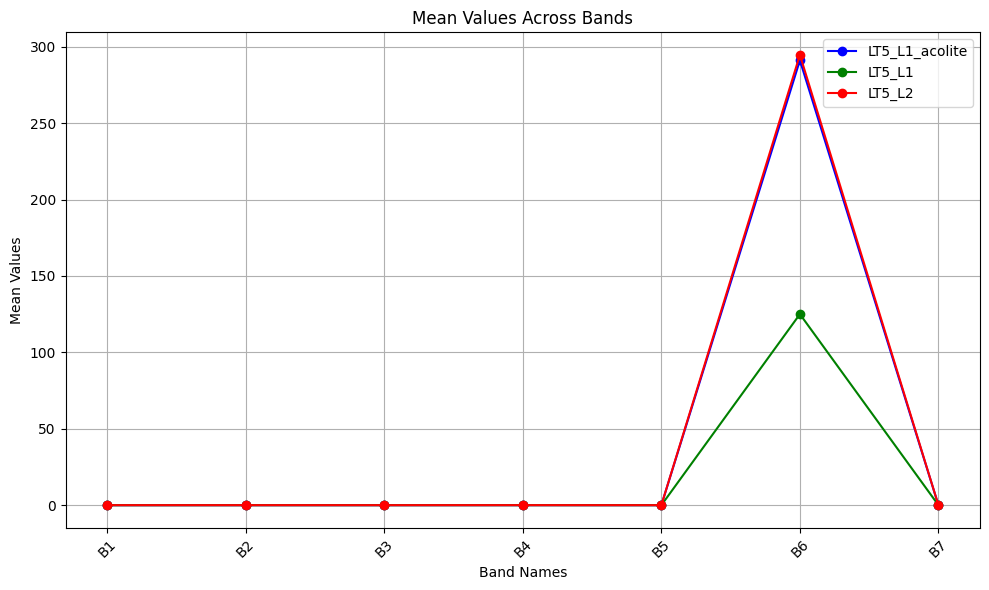

In [7]:
import matplotlib.pyplot as plt

# Assuming you have already generated the three DataFrames: LT5_L1_acolite, LT5_L1, LT5_L2

# Define the column names representing the bands
band_names = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']

# Initialize lists to store mean values for each band across the three dataframes
mean_values_LT5_L1_acolite = []
mean_values_LT5_L1 = []
mean_values_LT5_L2 = []

# Calculate mean values for each band across the three dataframes
for band in band_names:
    mean_LT5_L1_acolite = LT5_L1_acolite[band].mean()
    mean_LT5_L1 = LT5_L1[band].mean()
    mean_LT5_L2 = LT5_L2[band].mean()
    
    mean_values_LT5_L1_acolite.append(mean_LT5_L1_acolite)
    mean_values_LT5_L1.append(mean_LT5_L1)
    mean_values_LT5_L2.append(mean_LT5_L2)

# Plotting the line graph
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot mean values for each band across the three dataframes
plt.plot(band_names, mean_values_LT5_L1_acolite, marker='o', linestyle='-', color='b', label='LT5_L1_acolite')
plt.plot(band_names, mean_values_LT5_L1, marker='o', linestyle='-', color='g', label='LT5_L1')
plt.plot(band_names, mean_values_LT5_L2, marker='o', linestyle='-', color='r', label='LT5_L2')

# Add labels and title
plt.xlabel('Band Names')
plt.ylabel('Mean Values')
plt.title('Mean Values Across Bands')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid lines
plt.legend()  # Add legend

# Show plot
plt.tight_layout()  # Ensure all elements fit nicely in the figure
plt.show()


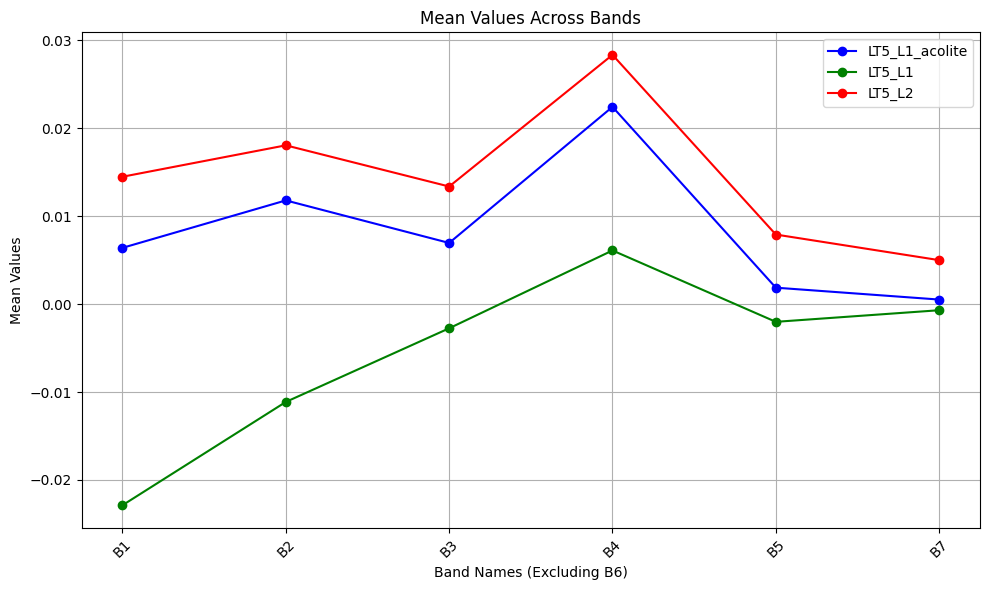

In [8]:
import matplotlib.pyplot as plt

# Assuming you have already generated the three DataFrames: LT5_L1_acolite, LT5_L1, LT5_L2

# Define the column names representing the bands (excluding B6)
band_names = ['B1', 'B2', 'B3', 'B4', 'B5', 'B7']

# Initialize lists to store mean values for each band across the three dataframes
mean_values_LT5_L1_acolite = []
mean_values_LT5_L1 = []
mean_values_LT5_L2 = []

# Calculate mean values for each band across the three dataframes (excluding B6)
for band in band_names:
    mean_LT5_L1_acolite = LT5_L1_acolite[band].mean()
    mean_LT5_L1 = LT5_L1[band].mean()
    mean_LT5_L2 = LT5_L2[band].mean()
    
    mean_values_LT5_L1_acolite.append(mean_LT5_L1_acolite)
    mean_values_LT5_L1.append(mean_LT5_L1)
    mean_values_LT5_L2.append(mean_LT5_L2)

# Plotting the line graph (excluding B6)
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot mean values for each band across the three dataframes (excluding B6)
plt.plot(band_names, mean_values_LT5_L1_acolite, marker='o', linestyle='-', color='b', label='LT5_L1_acolite')
plt.plot(band_names, mean_values_LT5_L1, marker='o', linestyle='-', color='g', label='LT5_L1')
plt.plot(band_names, mean_values_LT5_L2, marker='o', linestyle='-', color='r', label='LT5_L2')

# Add labels and title
plt.xlabel('Band Names (Excluding B6)')
plt.ylabel('Mean Values')
plt.title('Mean Values Across Bands')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid lines
plt.legend()  # Add legend

# Show plot
plt.tight_layout()  # Ensure all elements fit nicely in the figure
plt.show()


In [9]:
import pandas as pd

# # Ensure the indices are the same
# LT5_L1_acolite.reset_index(drop=True, inplace=True)
# LT5_L2.reset_index(drop=True, inplace=True)

# Merge the two dataframes on 'row' and 'col'
merged_df = pd.merge(LT5_L1_acolite, LT5_L2, on=['row', 'col'], suffixes=('_L1_acolite', '_L2'))

# List of bands to compute the difference for
bands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']

# Calculate the differences
differences = pd.DataFrame()
differences['row'] = merged_df['row']
differences['col'] = merged_df['col']

# LT5_L1_acolite - LT5_L2
for band in bands:
    differences[band] = merged_df[f'{band}_L2'] - merged_df[f'{band}_L1_acolite']

# Display the result
differences

,row,col,B1,B2,B3,B4,B5,B6,B7
0,1297,5953,0.011264,0.009975,0.010728,0.010853,0.010430,3.5721,0.008917
1,1297,5954,0.007809,0.005895,0.006334,0.006150,0.005782,3.5721,0.004615
2,1297,5955,0.008403,0.006650,0.007105,0.006900,0.006659,3.5721,0.005397
3,1297,5956,0.007798,0.005905,0.006300,0.006048,0.005782,3.5721,0.004616
4,1298,5952,0.005601,0.003341,0.003539,0.003102,0.002796,3.5721,0.001905
5,1298,5953,0.007808,0.005913,0.006306,0.006007,0.005782,3.5721,0.004614
6,1298,5954,0.008435,0.006639,0.007123,0.006902,0.006659,3.5721,0.005397
7,1298,5955,0.008430,0.006651,0.007120,0.007001,0.006659,3.5721,0.005397
8,1298,5956,0.007797,0.005905,0.006315,0.006148,0.005782,3.5721,0.004616
9,1298,5957,0.008422,0.006645,0.007101,0.006924,0.006657,3.5721,0.005397
